# DSCI 619 - Deep Learning, Project 3

### *Jeffery Boczkaja*

## 1. Load the dataset

In [1]:
import pandas as pd
df1 = pd.read_csv('PRSA_data.csv')
df1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


## 2. Clean the data and check missing values for this dataset

In [2]:
df1.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [3]:
df1 = df1.drop('station', axis=1)

In [4]:
df1.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         81
WSPM       14
dtype: int64

In [5]:
#Remove the rows with null values
df = df1.dropna()

# Checking shape before and after dropping NaN rows
original_shape = df1.shape
cleaned_shape = df.shape

original_shape, cleaned_shape

((35064, 17), (31815, 17))

In [6]:
catFeatures = ['wd']
df[catFeatures].describe(include='all').loc['unique', :]

wd    16
Name: unique, dtype: object

## 3. Perform feature engineering on the date feature.

In [7]:
# First convert 'wd' to category
s

C:\Users\whitl\AppData\Local\Temp\ipykernel_19684\3080623134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wd'] = df['wd'].astype('category')


No          int64
year        int64
month       int64
day         int64
hour        int64
PM2.5     float64
PM10      float64
SO2       float64
NO2       float64
CO        float64
O3        float64
TEMP      float64
PRES      float64
DEWP      float64
RAIN      float64
wd       category
WSPM      float64
dtype: object

In [8]:
# Shortcut for mapping values onto 'wd'
df['wd'] = df['wd'].cat.codes

C:\Users\whitl\AppData\Local\Temp\ipykernel_19684\2688918798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wd'] = df['wd'].cat.codes


In [9]:
df['wd'].unique()

array([ 6,  3,  7,  5,  1,  0,  4, 13, 11, 15,  9, 14, 10,  2,  8, 12],
      dtype=int8)

In [10]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
TEMP     float64
PRES     float64
DEWP     float64
RAIN     float64
wd          int8
WSPM     float64
dtype: object

### Let's summarize the variables

In [11]:
import numpy as np
#specify the continuous features
numerics =['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 
           'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM',
       ]
#summarize it
np.round(df[numerics].describe(), decimals=2)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,31815.00,31815.00,31815.00,31815.00,31815.00,31815.00,31815.00,31815.00,31815.00,31815.00,31815.00,31815.00,31815.00,31815.00,31815.00,31815.00,31815.00
mean,17899.42,2014.71,6.40,15.58,11.62,81.86,109.12,17.17,58.98,1256.57,56.24,13.78,1011.80,3.24,0.07,6.54,1.72
std,10058.43,1.16,3.42,8.79,6.93,80.45,93.72,22.76,37.06,1223.30,57.83,11.37,10.34,13.67,0.84,4.68,1.20
min,1.00,2013.00,1.00,1.00,0.00,3.00,2.00,0.57,2.00,100.00,0.21,-16.80,985.90,-35.30,0.00,0.00,0.00
25%,9415.50,2014.00,3.00,8.00,6.00,22.00,37.00,3.00,30.00,500.00,8.00,3.40,1003.30,-8.00,0.00,3.00,0.90
50%,18093.00,2015.00,6.00,15.00,12.00,58.00,86.00,8.00,53.00,800.00,42.00,14.80,1011.20,4.00,0.00,5.00,1.40
75%,26590.50,2016.00,9.00,23.00,18.00,114.00,154.00,21.00,82.00,1500.00,82.00,23.40,1020.00,15.70,0.00,11.00,2.20
max,35064.00,2017.00,12.00,31.00,23.00,713.00,948.00,229.00,290.00,10000.00,423.00,40.50,1042.00,28.50,46.40,15.00,11.20


In [12]:
np.round(df[numerics].corr(), decimals=2)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
No,1.00,0.97,0.07,0.03,0.01,-0.03,-0.09,-0.25,-0.09,0.07,0.06,-0.12,0.24,-0.14,0.00,-0.07,0.10
year,0.97,1.00,-0.18,0.00,0.00,-0.03,-0.08,-0.18,-0.11,0.06,0.09,-0.16,0.25,-0.22,-0.00,-0.06,0.14
month,0.07,-0.18,1.00,0.01,0.00,0.02,-0.04,-0.27,0.11,0.05,-0.09,0.18,-0.04,0.32,0.02,-0.07,-0.16
day,0.03,0.00,0.01,1.00,-0.00,0.01,0.03,-0.02,0.02,-0.02,0.01,0.03,0.01,0.04,-0.00,0.01,-0.02
hour,0.01,0.00,0.00,-0.00,1.00,-0.01,0.02,0.00,-0.05,-0.05,0.30,0.14,-0.04,-0.01,0.01,0.24,0.15
PM2.5,-0.03,-0.03,0.02,0.01,-0.01,1.00,0.88,0.49,0.69,0.79,-0.17,-0.13,-0.01,0.13,-0.02,-0.10,-0.29
PM10,-0.09,-0.08,-0.04,0.03,0.02,0.88,1.00,0.48,0.65,0.68,-0.15,-0.11,-0.03,0.06,-0.03,-0.05,-0.19
SO2,-0.25,-0.18,-0.27,-0.02,0.00,0.49,0.48,1.00,0.44,0.54,-0.20,-0.35,0.20,-0.28,-0.04,-0.02,-0.11
NO2,-0.09,-0.11,0.11,0.02,-0.05,0.69,0.65,0.44,1.00,0.69,-0.51,-0.24,0.09,0.06,-0.04,-0.13,-0.49
CO,0.07,0.06,0.05,-0.02,-0.05,0.79,0.68,0.54,0.69,1.00,-0.33,-0.36,0.21,-0.10,-0.02,-0.18,-0.28


## 4. Split the data into 80% of training and 20% of the test dataset

In [13]:
X = df.drop('wd', axis=1)
y = df['wd']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

## 5. Preprocess the data using the normalization method to convert all features into the range of [0,1]

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Fit and transform the training data
X_train= scaler.fit_transform(X_train)
#Only transform the test data
X_test = scaler.transform(X_test)

In [15]:
# To save us time reprocessing for problem 8
df2 = df

## 6. Build a neuron network with two hidden layers of 20 and 10 neurons to forecast wd using all other features and TensorFlow.

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = keras.Sequential()
#First hidden layer with 20 neurons
model.add(layers.Dense(20, activation='relu'))
# Second hidden layer with 10 neurons
model.add(layers.Dense(10, activation='relu'))
# Output layer has one and only one neuron
model.add(layers.Dense( units = len(df['wd'].unique()), activation='softmax'))

In [18]:
#Configure the model by choosing optimizer and loss function
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
%%time
#Fix the seed 
tf.random.set_seed(1)
#Fit the model and save the results in history
history = model.fit(x=X_train,y=y_train,batch_size=64,epochs=100,
          validation_data=(X_test,y_test), verbose= 1
          )

Epoch 1/100
398/398 [==============================] - 3s 4ms/step - loss: 2.6482 - accuracy: 0.1379 - val_loss: 2.5883 - val_accuracy: 0.1779
Epoch 2/100
398/398 [==============================] - 1s 2ms/step - loss: 2.5392 - accuracy: 0.1906 - val_loss: 2.5022 - val_accuracy: 0.1953
Epoch 3/100
398/398 [==============================] - 1s 2ms/step - loss: 2.4703 - accuracy: 0.1983 - val_loss: 2.4548 - val_accuracy: 0.1968
Epoch 4/100
398/398 [==============================] - 1s 2ms/step - loss: 2.4314 - accuracy: 0.2017 - val_loss: 2.4274 - val_accuracy: 0.1972
Epoch 5/100
398/398 [==============================] - 1s 2ms/step - loss: 2.4077 - accuracy: 0.2047 - val_loss: 2.4064 - val_accuracy: 0.2037
Epoch 6/100
398/398 [==============================] - 1s 2ms/step - loss: 2.3910 - accuracy: 0.2084 - val_loss: 2.3966 - val_accuracy: 0.2043
Epoch 7/100
398/398 [==============================] - 1s 2ms/step - loss: 2.3782 - accuracy: 0.2107 - val_loss: 2.3810 - val_accuracy: 0.2098

Epoch 58/100
398/398 [==============================] - 1s 3ms/step - loss: 2.2739 - accuracy: 0.2403 - val_loss: 2.2972 - val_accuracy: 0.2397
Epoch 59/100
398/398 [==============================] - 1s 3ms/step - loss: 2.2725 - accuracy: 0.2407 - val_loss: 2.2969 - val_accuracy: 0.2390
Epoch 60/100
398/398 [==============================] - 1s 3ms/step - loss: 2.2720 - accuracy: 0.2421 - val_loss: 2.2998 - val_accuracy: 0.2346
Epoch 61/100
398/398 [==============================] - 1s 3ms/step - loss: 2.2705 - accuracy: 0.2413 - val_loss: 2.2945 - val_accuracy: 0.2373
Epoch 62/100
398/398 [==============================] - 1s 3ms/step - loss: 2.2698 - accuracy: 0.2414 - val_loss: 2.2972 - val_accuracy: 0.2392
Epoch 63/100
398/398 [==============================] - 1s 3ms/step - loss: 2.2692 - accuracy: 0.2425 - val_loss: 2.2897 - val_accuracy: 0.2417
Epoch 64/100
398/398 [==============================] - 1s 3ms/step - loss: 2.2681 - accuracy: 0.2416 - val_loss: 2.2909 - val_accuracy:

In [20]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame(history.history)
#Add the epoch index
trainhist['epoch'] = history.epoch
#Look at the latest performance
trainhist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,2.246188,0.247407,2.271763,0.244067,95
96,2.246148,0.247014,2.272069,0.247210,96
97,2.245070,0.247564,2.270082,0.247682,97
98,2.244845,0.248075,2.273172,0.244067,98
99,2.244280,0.246071,2.275474,0.244224,99


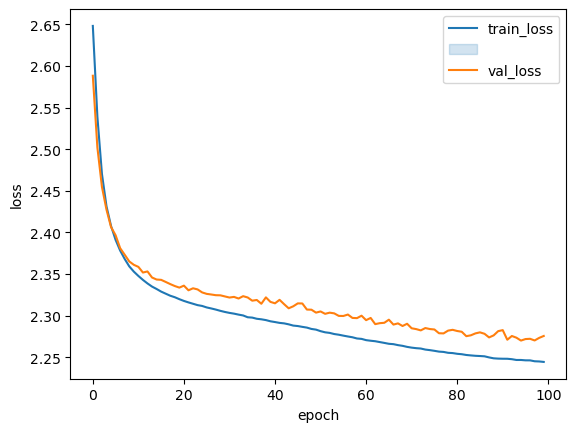

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', '', 'val_loss'])

In [22]:
%%time
#Fix the seed
tf.random.set_seed(1)
#Increase the epochs to 2K
history = model.fit(x=X_train,y=y_train,batch_size=64,epochs=2000,
          validation_data=(X_test,y_test), verbose=2
          )

Epoch 1/2000
398/398 - 1s - loss: 2.2440 - accuracy: 0.2496 - val_loss: 2.2685 - val_accuracy: 0.2455 - 1s/epoch - 3ms/step
Epoch 2/2000
398/398 - 1s - loss: 2.2439 - accuracy: 0.2474 - val_loss: 2.2721 - val_accuracy: 0.2444 - 983ms/epoch - 2ms/step
Epoch 3/2000
398/398 - 1s - loss: 2.2426 - accuracy: 0.2473 - val_loss: 2.2712 - val_accuracy: 0.2434 - 1s/epoch - 3ms/step
Epoch 4/2000
398/398 - 1s - loss: 2.2420 - accuracy: 0.2481 - val_loss: 2.2679 - val_accuracy: 0.2444 - 985ms/epoch - 2ms/step
Epoch 5/2000
398/398 - 1s - loss: 2.2420 - accuracy: 0.2475 - val_loss: 2.2678 - val_accuracy: 0.2469 - 1s/epoch - 3ms/step
Epoch 6/2000
398/398 - 1s - loss: 2.2418 - accuracy: 0.2492 - val_loss: 2.2726 - val_accuracy: 0.2480 - 1s/epoch - 3ms/step
Epoch 7/2000
398/398 - 1s - loss: 2.2413 - accuracy: 0.2491 - val_loss: 2.2682 - val_accuracy: 0.2460 - 1s/epoch - 3ms/step
Epoch 8/2000
398/398 - 1s - loss: 2.2410 - accuracy: 0.2497 - val_loss: 2.2699 - val_accuracy: 0.2447 - 986ms/epoch - 2ms/step

Epoch 67/2000
398/398 - 1s - loss: 2.2198 - accuracy: 0.2528 - val_loss: 2.2475 - val_accuracy: 0.2511 - 1s/epoch - 3ms/step
Epoch 68/2000
398/398 - 1s - loss: 2.2189 - accuracy: 0.2537 - val_loss: 2.2518 - val_accuracy: 0.2491 - 958ms/epoch - 2ms/step
Epoch 69/2000
398/398 - 1s - loss: 2.2186 - accuracy: 0.2522 - val_loss: 2.2509 - val_accuracy: 0.2461 - 1s/epoch - 3ms/step
Epoch 70/2000
398/398 - 1s - loss: 2.2180 - accuracy: 0.2548 - val_loss: 2.2539 - val_accuracy: 0.2497 - 1s/epoch - 3ms/step
Epoch 71/2000
398/398 - 1s - loss: 2.2177 - accuracy: 0.2539 - val_loss: 2.2477 - val_accuracy: 0.2494 - 1s/epoch - 3ms/step
Epoch 72/2000
398/398 - 1s - loss: 2.2168 - accuracy: 0.2548 - val_loss: 2.2508 - val_accuracy: 0.2483 - 971ms/epoch - 2ms/step
Epoch 73/2000
398/398 - 1s - loss: 2.2171 - accuracy: 0.2516 - val_loss: 2.2482 - val_accuracy: 0.2485 - 991ms/epoch - 2ms/step
Epoch 74/2000
398/398 - 1s - loss: 2.2170 - accuracy: 0.2539 - val_loss: 2.2468 - val_accuracy: 0.2486 - 1s/epoch - 

Epoch 132/2000
398/398 - 1s - loss: 2.2010 - accuracy: 0.2571 - val_loss: 2.2418 - val_accuracy: 0.2555 - 1s/epoch - 3ms/step
Epoch 133/2000
398/398 - 2s - loss: 2.2006 - accuracy: 0.2571 - val_loss: 2.2368 - val_accuracy: 0.2508 - 2s/epoch - 4ms/step
Epoch 134/2000
398/398 - 1s - loss: 2.2005 - accuracy: 0.2557 - val_loss: 2.2422 - val_accuracy: 0.2562 - 1s/epoch - 3ms/step
Epoch 135/2000
398/398 - 1s - loss: 2.2004 - accuracy: 0.2603 - val_loss: 2.2397 - val_accuracy: 0.2507 - 999ms/epoch - 3ms/step
Epoch 136/2000
398/398 - 1s - loss: 2.2002 - accuracy: 0.2568 - val_loss: 2.2375 - val_accuracy: 0.2497 - 944ms/epoch - 2ms/step
Epoch 137/2000
398/398 - 1s - loss: 2.2000 - accuracy: 0.2570 - val_loss: 2.2405 - val_accuracy: 0.2540 - 966ms/epoch - 2ms/step
Epoch 138/2000
398/398 - 1s - loss: 2.1999 - accuracy: 0.2564 - val_loss: 2.2371 - val_accuracy: 0.2559 - 991ms/epoch - 2ms/step
Epoch 139/2000
398/398 - 1s - loss: 2.2005 - accuracy: 0.2557 - val_loss: 2.2388 - val_accuracy: 0.2513 - 

Epoch 197/2000
398/398 - 1s - loss: 2.1926 - accuracy: 0.2577 - val_loss: 2.2399 - val_accuracy: 0.2566 - 1s/epoch - 3ms/step
Epoch 198/2000
398/398 - 1s - loss: 2.1928 - accuracy: 0.2579 - val_loss: 2.2411 - val_accuracy: 0.2533 - 1s/epoch - 3ms/step
Epoch 199/2000
398/398 - 1s - loss: 2.1920 - accuracy: 0.2577 - val_loss: 2.2425 - val_accuracy: 0.2551 - 1s/epoch - 3ms/step
Epoch 200/2000
398/398 - 1s - loss: 2.1919 - accuracy: 0.2570 - val_loss: 2.2344 - val_accuracy: 0.2552 - 1s/epoch - 3ms/step
Epoch 201/2000
398/398 - 1s - loss: 2.1914 - accuracy: 0.2586 - val_loss: 2.2478 - val_accuracy: 0.2551 - 1s/epoch - 3ms/step
Epoch 202/2000
398/398 - 1s - loss: 2.1919 - accuracy: 0.2570 - val_loss: 2.2454 - val_accuracy: 0.2527 - 1s/epoch - 3ms/step
Epoch 203/2000
398/398 - 1s - loss: 2.1917 - accuracy: 0.2582 - val_loss: 2.2316 - val_accuracy: 0.2566 - 1s/epoch - 3ms/step
Epoch 204/2000
398/398 - 1s - loss: 2.1909 - accuracy: 0.2569 - val_loss: 2.2341 - val_accuracy: 0.2557 - 1s/epoch - 3

Epoch 262/2000
398/398 - 1s - loss: 2.1866 - accuracy: 0.2597 - val_loss: 2.2315 - val_accuracy: 0.2570 - 1s/epoch - 3ms/step
Epoch 263/2000
398/398 - 1s - loss: 2.1867 - accuracy: 0.2575 - val_loss: 2.2273 - val_accuracy: 0.2568 - 1s/epoch - 3ms/step
Epoch 264/2000
398/398 - 1s - loss: 2.1866 - accuracy: 0.2600 - val_loss: 2.2285 - val_accuracy: 0.2549 - 1s/epoch - 4ms/step
Epoch 265/2000
398/398 - 1s - loss: 2.1862 - accuracy: 0.2569 - val_loss: 2.2322 - val_accuracy: 0.2535 - 994ms/epoch - 2ms/step
Epoch 266/2000
398/398 - 1s - loss: 2.1854 - accuracy: 0.2569 - val_loss: 2.2290 - val_accuracy: 0.2590 - 1s/epoch - 3ms/step
Epoch 267/2000
398/398 - 1s - loss: 2.1861 - accuracy: 0.2611 - val_loss: 2.2301 - val_accuracy: 0.2566 - 1s/epoch - 3ms/step
Epoch 268/2000
398/398 - 1s - loss: 2.1865 - accuracy: 0.2586 - val_loss: 2.2383 - val_accuracy: 0.2570 - 1s/epoch - 4ms/step
Epoch 269/2000
398/398 - 1s - loss: 2.1850 - accuracy: 0.2606 - val_loss: 2.2274 - val_accuracy: 0.2598 - 1s/epoch 

Epoch 327/2000
398/398 - 1s - loss: 2.1828 - accuracy: 0.2591 - val_loss: 2.2238 - val_accuracy: 0.2552 - 1s/epoch - 3ms/step
Epoch 328/2000
398/398 - 1s - loss: 2.1836 - accuracy: 0.2592 - val_loss: 2.2257 - val_accuracy: 0.2599 - 1s/epoch - 3ms/step
Epoch 329/2000
398/398 - 1s - loss: 2.1830 - accuracy: 0.2594 - val_loss: 2.2243 - val_accuracy: 0.2601 - 1s/epoch - 3ms/step
Epoch 330/2000
398/398 - 1s - loss: 2.1837 - accuracy: 0.2601 - val_loss: 2.2298 - val_accuracy: 0.2576 - 1s/epoch - 3ms/step
Epoch 331/2000
398/398 - 1s - loss: 2.1828 - accuracy: 0.2608 - val_loss: 2.2263 - val_accuracy: 0.2629 - 1s/epoch - 3ms/step
Epoch 332/2000
398/398 - 1s - loss: 2.1842 - accuracy: 0.2594 - val_loss: 2.2239 - val_accuracy: 0.2566 - 1s/epoch - 3ms/step
Epoch 333/2000
398/398 - 1s - loss: 2.1835 - accuracy: 0.2596 - val_loss: 2.2305 - val_accuracy: 0.2576 - 1s/epoch - 3ms/step
Epoch 334/2000
398/398 - 1s - loss: 2.1828 - accuracy: 0.2601 - val_loss: 2.2296 - val_accuracy: 0.2549 - 1s/epoch - 3

Epoch 392/2000
398/398 - 1s - loss: 2.1803 - accuracy: 0.2623 - val_loss: 2.2238 - val_accuracy: 0.2557 - 994ms/epoch - 2ms/step
Epoch 393/2000
398/398 - 1s - loss: 2.1811 - accuracy: 0.2594 - val_loss: 2.2256 - val_accuracy: 0.2568 - 1s/epoch - 3ms/step
Epoch 394/2000
398/398 - 1s - loss: 2.1807 - accuracy: 0.2595 - val_loss: 2.2241 - val_accuracy: 0.2570 - 1s/epoch - 3ms/step
Epoch 395/2000
398/398 - 1s - loss: 2.1815 - accuracy: 0.2603 - val_loss: 2.2261 - val_accuracy: 0.2584 - 1s/epoch - 3ms/step
Epoch 396/2000
398/398 - 1s - loss: 2.1801 - accuracy: 0.2606 - val_loss: 2.2250 - val_accuracy: 0.2562 - 952ms/epoch - 2ms/step
Epoch 397/2000
398/398 - 1s - loss: 2.1798 - accuracy: 0.2628 - val_loss: 2.2269 - val_accuracy: 0.2592 - 1s/epoch - 3ms/step
Epoch 398/2000
398/398 - 1s - loss: 2.1805 - accuracy: 0.2611 - val_loss: 2.2269 - val_accuracy: 0.2581 - 1s/epoch - 3ms/step
Epoch 399/2000
398/398 - 1s - loss: 2.1794 - accuracy: 0.2617 - val_loss: 2.2306 - val_accuracy: 0.2577 - 1s/epo

Epoch 457/2000
398/398 - 1s - loss: 2.1768 - accuracy: 0.2612 - val_loss: 2.2189 - val_accuracy: 0.2549 - 1s/epoch - 3ms/step
Epoch 458/2000
398/398 - 1s - loss: 2.1770 - accuracy: 0.2619 - val_loss: 2.2224 - val_accuracy: 0.2555 - 1s/epoch - 3ms/step
Epoch 459/2000
398/398 - 1s - loss: 2.1767 - accuracy: 0.2601 - val_loss: 2.2209 - val_accuracy: 0.2579 - 1s/epoch - 3ms/step
Epoch 460/2000
398/398 - 1s - loss: 2.1767 - accuracy: 0.2635 - val_loss: 2.2232 - val_accuracy: 0.2540 - 1s/epoch - 3ms/step
Epoch 461/2000
398/398 - 1s - loss: 2.1766 - accuracy: 0.2605 - val_loss: 2.2185 - val_accuracy: 0.2559 - 1s/epoch - 3ms/step
Epoch 462/2000
398/398 - 1s - loss: 2.1760 - accuracy: 0.2627 - val_loss: 2.2224 - val_accuracy: 0.2576 - 1s/epoch - 3ms/step
Epoch 463/2000
398/398 - 1s - loss: 2.1768 - accuracy: 0.2597 - val_loss: 2.2206 - val_accuracy: 0.2598 - 1s/epoch - 3ms/step
Epoch 464/2000
398/398 - 1s - loss: 2.1762 - accuracy: 0.2623 - val_loss: 2.2195 - val_accuracy: 0.2574 - 1s/epoch - 3

Epoch 522/2000
398/398 - 1s - loss: 2.1737 - accuracy: 0.2628 - val_loss: 2.2200 - val_accuracy: 0.2592 - 1s/epoch - 3ms/step
Epoch 523/2000
398/398 - 1s - loss: 2.1746 - accuracy: 0.2625 - val_loss: 2.2288 - val_accuracy: 0.2581 - 962ms/epoch - 2ms/step
Epoch 524/2000
398/398 - 1s - loss: 2.1730 - accuracy: 0.2635 - val_loss: 2.2224 - val_accuracy: 0.2573 - 1s/epoch - 3ms/step
Epoch 525/2000
398/398 - 1s - loss: 2.1733 - accuracy: 0.2654 - val_loss: 2.2245 - val_accuracy: 0.2566 - 1s/epoch - 3ms/step
Epoch 526/2000
398/398 - 1s - loss: 2.1731 - accuracy: 0.2630 - val_loss: 2.2252 - val_accuracy: 0.2584 - 1s/epoch - 3ms/step
Epoch 527/2000
398/398 - 1s - loss: 2.1741 - accuracy: 0.2620 - val_loss: 2.2244 - val_accuracy: 0.2568 - 1s/epoch - 3ms/step
Epoch 528/2000
398/398 - 1s - loss: 2.1736 - accuracy: 0.2622 - val_loss: 2.2248 - val_accuracy: 0.2587 - 1s/epoch - 3ms/step
Epoch 529/2000
398/398 - 1s - loss: 2.1740 - accuracy: 0.2643 - val_loss: 2.2210 - val_accuracy: 0.2596 - 1s/epoch 

Epoch 587/2000
398/398 - 1s - loss: 2.1708 - accuracy: 0.2657 - val_loss: 2.2209 - val_accuracy: 0.2555 - 1s/epoch - 4ms/step
Epoch 588/2000
398/398 - 1s - loss: 2.1723 - accuracy: 0.2652 - val_loss: 2.2192 - val_accuracy: 0.2637 - 1s/epoch - 3ms/step
Epoch 589/2000
398/398 - 1s - loss: 2.1725 - accuracy: 0.2638 - val_loss: 2.2244 - val_accuracy: 0.2598 - 1s/epoch - 3ms/step
Epoch 590/2000
398/398 - 1s - loss: 2.1713 - accuracy: 0.2640 - val_loss: 2.2216 - val_accuracy: 0.2538 - 1s/epoch - 3ms/step
Epoch 591/2000
398/398 - 1s - loss: 2.1719 - accuracy: 0.2634 - val_loss: 2.2218 - val_accuracy: 0.2587 - 1s/epoch - 3ms/step
Epoch 592/2000
398/398 - 1s - loss: 2.1723 - accuracy: 0.2637 - val_loss: 2.2146 - val_accuracy: 0.2612 - 1s/epoch - 3ms/step
Epoch 593/2000
398/398 - 1s - loss: 2.1722 - accuracy: 0.2640 - val_loss: 2.2177 - val_accuracy: 0.2560 - 979ms/epoch - 2ms/step
Epoch 594/2000
398/398 - 1s - loss: 2.1724 - accuracy: 0.2650 - val_loss: 2.2237 - val_accuracy: 0.2584 - 986ms/epo

Epoch 652/2000
398/398 - 1s - loss: 2.1694 - accuracy: 0.2650 - val_loss: 2.2195 - val_accuracy: 0.2617 - 998ms/epoch - 3ms/step
Epoch 653/2000
398/398 - 1s - loss: 2.1700 - accuracy: 0.2645 - val_loss: 2.2185 - val_accuracy: 0.2595 - 1s/epoch - 3ms/step
Epoch 654/2000
398/398 - 1s - loss: 2.1711 - accuracy: 0.2643 - val_loss: 2.2246 - val_accuracy: 0.2625 - 1s/epoch - 3ms/step
Epoch 655/2000
398/398 - 1s - loss: 2.1699 - accuracy: 0.2666 - val_loss: 2.2146 - val_accuracy: 0.2615 - 1s/epoch - 3ms/step
Epoch 656/2000
398/398 - 1s - loss: 2.1701 - accuracy: 0.2632 - val_loss: 2.2127 - val_accuracy: 0.2612 - 1s/epoch - 3ms/step
Epoch 657/2000
398/398 - 1s - loss: 2.1694 - accuracy: 0.2662 - val_loss: 2.2143 - val_accuracy: 0.2629 - 1s/epoch - 3ms/step
Epoch 658/2000
398/398 - 1s - loss: 2.1704 - accuracy: 0.2661 - val_loss: 2.2189 - val_accuracy: 0.2618 - 1s/epoch - 3ms/step
Epoch 659/2000
398/398 - 1s - loss: 2.1699 - accuracy: 0.2629 - val_loss: 2.2167 - val_accuracy: 0.2620 - 1s/epoch 

Epoch 717/2000
398/398 - 1s - loss: 2.1684 - accuracy: 0.2649 - val_loss: 2.2145 - val_accuracy: 0.2645 - 1s/epoch - 3ms/step
Epoch 718/2000
398/398 - 1s - loss: 2.1697 - accuracy: 0.2647 - val_loss: 2.2165 - val_accuracy: 0.2629 - 1s/epoch - 3ms/step
Epoch 719/2000
398/398 - 1s - loss: 2.1685 - accuracy: 0.2656 - val_loss: 2.2155 - val_accuracy: 0.2621 - 1s/epoch - 3ms/step
Epoch 720/2000
398/398 - 1s - loss: 2.1688 - accuracy: 0.2654 - val_loss: 2.2210 - val_accuracy: 0.2595 - 982ms/epoch - 2ms/step
Epoch 721/2000
398/398 - 1s - loss: 2.1684 - accuracy: 0.2648 - val_loss: 2.2140 - val_accuracy: 0.2620 - 968ms/epoch - 2ms/step
Epoch 722/2000
398/398 - 1s - loss: 2.1692 - accuracy: 0.2664 - val_loss: 2.2232 - val_accuracy: 0.2596 - 982ms/epoch - 2ms/step
Epoch 723/2000
398/398 - 1s - loss: 2.1679 - accuracy: 0.2665 - val_loss: 2.2197 - val_accuracy: 0.2585 - 1s/epoch - 3ms/step
Epoch 724/2000
398/398 - 1s - loss: 2.1693 - accuracy: 0.2651 - val_loss: 2.2142 - val_accuracy: 0.2615 - 1s/

Epoch 782/2000
398/398 - 1s - loss: 2.1685 - accuracy: 0.2667 - val_loss: 2.2158 - val_accuracy: 0.2686 - 1s/epoch - 3ms/step
Epoch 783/2000
398/398 - 1s - loss: 2.1675 - accuracy: 0.2643 - val_loss: 2.2192 - val_accuracy: 0.2614 - 1s/epoch - 3ms/step
Epoch 784/2000
398/398 - 1s - loss: 2.1688 - accuracy: 0.2646 - val_loss: 2.2135 - val_accuracy: 0.2581 - 933ms/epoch - 2ms/step
Epoch 785/2000
398/398 - 1s - loss: 2.1681 - accuracy: 0.2638 - val_loss: 2.2220 - val_accuracy: 0.2599 - 1s/epoch - 3ms/step
Epoch 786/2000
398/398 - 1s - loss: 2.1692 - accuracy: 0.2647 - val_loss: 2.2207 - val_accuracy: 0.2623 - 971ms/epoch - 2ms/step
Epoch 787/2000
398/398 - 1s - loss: 2.1683 - accuracy: 0.2666 - val_loss: 2.2162 - val_accuracy: 0.2637 - 968ms/epoch - 2ms/step
Epoch 788/2000
398/398 - 1s - loss: 2.1683 - accuracy: 0.2669 - val_loss: 2.2143 - val_accuracy: 0.2667 - 1s/epoch - 3ms/step
Epoch 789/2000
398/398 - 1s - loss: 2.1678 - accuracy: 0.2648 - val_loss: 2.2104 - val_accuracy: 0.2636 - 1s/

Epoch 847/2000
398/398 - 1s - loss: 2.1679 - accuracy: 0.2640 - val_loss: 2.2187 - val_accuracy: 0.2628 - 737ms/epoch - 2ms/step
Epoch 848/2000
398/398 - 1s - loss: 2.1677 - accuracy: 0.2650 - val_loss: 2.2325 - val_accuracy: 0.2609 - 705ms/epoch - 2ms/step
Epoch 849/2000
398/398 - 1s - loss: 2.1671 - accuracy: 0.2665 - val_loss: 2.2189 - val_accuracy: 0.2599 - 704ms/epoch - 2ms/step
Epoch 850/2000
398/398 - 1s - loss: 2.1675 - accuracy: 0.2634 - val_loss: 2.2166 - val_accuracy: 0.2618 - 724ms/epoch - 2ms/step
Epoch 851/2000
398/398 - 1s - loss: 2.1673 - accuracy: 0.2625 - val_loss: 2.2215 - val_accuracy: 0.2645 - 810ms/epoch - 2ms/step
Epoch 852/2000
398/398 - 1s - loss: 2.1665 - accuracy: 0.2650 - val_loss: 2.2141 - val_accuracy: 0.2658 - 1s/epoch - 3ms/step
Epoch 853/2000
398/398 - 1s - loss: 2.1676 - accuracy: 0.2654 - val_loss: 2.2124 - val_accuracy: 0.2645 - 1s/epoch - 3ms/step
Epoch 854/2000
398/398 - 1s - loss: 2.1676 - accuracy: 0.2627 - val_loss: 2.2158 - val_accuracy: 0.2634

Epoch 912/2000
398/398 - 1s - loss: 2.1671 - accuracy: 0.2652 - val_loss: 2.2117 - val_accuracy: 0.2626 - 1s/epoch - 3ms/step
Epoch 913/2000
398/398 - 1s - loss: 2.1662 - accuracy: 0.2640 - val_loss: 2.2175 - val_accuracy: 0.2637 - 997ms/epoch - 3ms/step
Epoch 914/2000
398/398 - 1s - loss: 2.1657 - accuracy: 0.2648 - val_loss: 2.2158 - val_accuracy: 0.2625 - 1s/epoch - 3ms/step
Epoch 915/2000
398/398 - 1s - loss: 2.1658 - accuracy: 0.2645 - val_loss: 2.2110 - val_accuracy: 0.2620 - 1s/epoch - 3ms/step
Epoch 916/2000
398/398 - 1s - loss: 2.1662 - accuracy: 0.2627 - val_loss: 2.2125 - val_accuracy: 0.2595 - 989ms/epoch - 2ms/step
Epoch 917/2000
398/398 - 1s - loss: 2.1659 - accuracy: 0.2639 - val_loss: 2.2150 - val_accuracy: 0.2601 - 987ms/epoch - 2ms/step
Epoch 918/2000
398/398 - 1s - loss: 2.1669 - accuracy: 0.2634 - val_loss: 2.2121 - val_accuracy: 0.2595 - 976ms/epoch - 2ms/step
Epoch 919/2000
398/398 - 1s - loss: 2.1669 - accuracy: 0.2630 - val_loss: 2.2108 - val_accuracy: 0.2672 - 

Epoch 977/2000
398/398 - 1s - loss: 2.1653 - accuracy: 0.2650 - val_loss: 2.2147 - val_accuracy: 0.2570 - 1s/epoch - 4ms/step
Epoch 978/2000
398/398 - 1s - loss: 2.1643 - accuracy: 0.2669 - val_loss: 2.2158 - val_accuracy: 0.2584 - 1s/epoch - 3ms/step
Epoch 979/2000
398/398 - 1s - loss: 2.1652 - accuracy: 0.2638 - val_loss: 2.2149 - val_accuracy: 0.2584 - 924ms/epoch - 2ms/step
Epoch 980/2000
398/398 - 1s - loss: 2.1655 - accuracy: 0.2654 - val_loss: 2.2316 - val_accuracy: 0.2593 - 963ms/epoch - 2ms/step
Epoch 981/2000
398/398 - 1s - loss: 2.1644 - accuracy: 0.2633 - val_loss: 2.2198 - val_accuracy: 0.2581 - 963ms/epoch - 2ms/step
Epoch 982/2000
398/398 - 1s - loss: 2.1648 - accuracy: 0.2648 - val_loss: 2.2249 - val_accuracy: 0.2618 - 979ms/epoch - 2ms/step
Epoch 983/2000
398/398 - 1s - loss: 2.1659 - accuracy: 0.2630 - val_loss: 2.2179 - val_accuracy: 0.2631 - 1s/epoch - 3ms/step
Epoch 984/2000
398/398 - 1s - loss: 2.1641 - accuracy: 0.2643 - val_loss: 2.2381 - val_accuracy: 0.2471 - 

Epoch 1042/2000
398/398 - 1s - loss: 2.1650 - accuracy: 0.2665 - val_loss: 2.2110 - val_accuracy: 0.2560 - 968ms/epoch - 2ms/step
Epoch 1043/2000
398/398 - 1s - loss: 2.1636 - accuracy: 0.2661 - val_loss: 2.2224 - val_accuracy: 0.2614 - 966ms/epoch - 2ms/step
Epoch 1044/2000
398/398 - 1s - loss: 2.1652 - accuracy: 0.2654 - val_loss: 2.2162 - val_accuracy: 0.2634 - 967ms/epoch - 2ms/step
Epoch 1045/2000
398/398 - 1s - loss: 2.1631 - accuracy: 0.2642 - val_loss: 2.2299 - val_accuracy: 0.2568 - 973ms/epoch - 2ms/step
Epoch 1046/2000
398/398 - 1s - loss: 2.1643 - accuracy: 0.2624 - val_loss: 2.2134 - val_accuracy: 0.2628 - 1s/epoch - 3ms/step
Epoch 1047/2000
398/398 - 1s - loss: 2.1641 - accuracy: 0.2639 - val_loss: 2.2180 - val_accuracy: 0.2606 - 1s/epoch - 3ms/step
Epoch 1048/2000
398/398 - 1s - loss: 2.1652 - accuracy: 0.2641 - val_loss: 2.2135 - val_accuracy: 0.2614 - 1s/epoch - 3ms/step
Epoch 1049/2000
398/398 - 1s - loss: 2.1643 - accuracy: 0.2635 - val_loss: 2.2120 - val_accuracy: 0

398/398 - 1s - loss: 2.1634 - accuracy: 0.2627 - val_loss: 2.2155 - val_accuracy: 0.2565 - 972ms/epoch - 2ms/step
Epoch 1107/2000
398/398 - 1s - loss: 2.1632 - accuracy: 0.2627 - val_loss: 2.2292 - val_accuracy: 0.2606 - 1s/epoch - 3ms/step
Epoch 1108/2000
398/398 - 1s - loss: 2.1642 - accuracy: 0.2612 - val_loss: 2.2100 - val_accuracy: 0.2612 - 1s/epoch - 3ms/step
Epoch 1109/2000
398/398 - 1s - loss: 2.1632 - accuracy: 0.2650 - val_loss: 2.2239 - val_accuracy: 0.2612 - 1s/epoch - 3ms/step
Epoch 1110/2000
398/398 - 1s - loss: 2.1639 - accuracy: 0.2642 - val_loss: 2.2216 - val_accuracy: 0.2620 - 1s/epoch - 3ms/step
Epoch 1111/2000
398/398 - 1s - loss: 2.1633 - accuracy: 0.2645 - val_loss: 2.2166 - val_accuracy: 0.2507 - 1s/epoch - 4ms/step
Epoch 1112/2000
398/398 - 1s - loss: 2.1623 - accuracy: 0.2634 - val_loss: 2.2116 - val_accuracy: 0.2566 - 1s/epoch - 3ms/step
Epoch 1113/2000
398/398 - 1s - loss: 2.1634 - accuracy: 0.2647 - val_loss: 2.2097 - val_accuracy: 0.2618 - 1s/epoch - 3ms/st

Epoch 1171/2000
398/398 - 1s - loss: 2.1622 - accuracy: 0.2636 - val_loss: 2.2174 - val_accuracy: 0.2620 - 1s/epoch - 4ms/step
Epoch 1172/2000
398/398 - 1s - loss: 2.1626 - accuracy: 0.2643 - val_loss: 2.2176 - val_accuracy: 0.2596 - 1s/epoch - 3ms/step
Epoch 1173/2000
398/398 - 1s - loss: 2.1627 - accuracy: 0.2632 - val_loss: 2.2283 - val_accuracy: 0.2565 - 1s/epoch - 3ms/step
Epoch 1174/2000
398/398 - 1s - loss: 2.1634 - accuracy: 0.2658 - val_loss: 2.2101 - val_accuracy: 0.2614 - 1s/epoch - 3ms/step
Epoch 1175/2000
398/398 - 1s - loss: 2.1632 - accuracy: 0.2623 - val_loss: 2.2115 - val_accuracy: 0.2592 - 1s/epoch - 3ms/step
Epoch 1176/2000
398/398 - 1s - loss: 2.1611 - accuracy: 0.2618 - val_loss: 2.2114 - val_accuracy: 0.2582 - 994ms/epoch - 2ms/step
Epoch 1177/2000
398/398 - 1s - loss: 2.1634 - accuracy: 0.2629 - val_loss: 2.2237 - val_accuracy: 0.2599 - 1s/epoch - 3ms/step
Epoch 1178/2000
398/398 - 1s - loss: 2.1624 - accuracy: 0.2629 - val_loss: 2.2153 - val_accuracy: 0.2574 - 9

Epoch 1236/2000
398/398 - 1s - loss: 2.1633 - accuracy: 0.2625 - val_loss: 2.2117 - val_accuracy: 0.2571 - 985ms/epoch - 2ms/step
Epoch 1237/2000
398/398 - 1s - loss: 2.1635 - accuracy: 0.2625 - val_loss: 2.2277 - val_accuracy: 0.2511 - 1s/epoch - 3ms/step
Epoch 1238/2000
398/398 - 1s - loss: 2.1625 - accuracy: 0.2649 - val_loss: 2.2125 - val_accuracy: 0.2546 - 1s/epoch - 3ms/step
Epoch 1239/2000
398/398 - 1s - loss: 2.1615 - accuracy: 0.2630 - val_loss: 2.2180 - val_accuracy: 0.2601 - 1s/epoch - 3ms/step
Epoch 1240/2000
398/398 - 1s - loss: 2.1627 - accuracy: 0.2645 - val_loss: 2.2227 - val_accuracy: 0.2617 - 1s/epoch - 3ms/step
Epoch 1241/2000
398/398 - 1s - loss: 2.1635 - accuracy: 0.2632 - val_loss: 2.2228 - val_accuracy: 0.2568 - 979ms/epoch - 2ms/step
Epoch 1242/2000
398/398 - 1s - loss: 2.1628 - accuracy: 0.2647 - val_loss: 2.2152 - val_accuracy: 0.2595 - 974ms/epoch - 2ms/step
Epoch 1243/2000
398/398 - 1s - loss: 2.1632 - accuracy: 0.2638 - val_loss: 2.2139 - val_accuracy: 0.25

Epoch 1301/2000
398/398 - 1s - loss: 2.1621 - accuracy: 0.2655 - val_loss: 2.2263 - val_accuracy: 0.2552 - 1s/epoch - 3ms/step
Epoch 1302/2000
398/398 - 1s - loss: 2.1625 - accuracy: 0.2622 - val_loss: 2.2226 - val_accuracy: 0.2549 - 994ms/epoch - 2ms/step
Epoch 1303/2000
398/398 - 1s - loss: 2.1629 - accuracy: 0.2630 - val_loss: 2.2239 - val_accuracy: 0.2590 - 1s/epoch - 3ms/step
Epoch 1304/2000
398/398 - 1s - loss: 2.1618 - accuracy: 0.2638 - val_loss: 2.2226 - val_accuracy: 0.2541 - 1s/epoch - 3ms/step
Epoch 1305/2000
398/398 - 1s - loss: 2.1626 - accuracy: 0.2631 - val_loss: 2.2200 - val_accuracy: 0.2559 - 1s/epoch - 3ms/step
Epoch 1306/2000
398/398 - 1s - loss: 2.1624 - accuracy: 0.2627 - val_loss: 2.2237 - val_accuracy: 0.2549 - 1s/epoch - 3ms/step
Epoch 1307/2000
398/398 - 1s - loss: 2.1631 - accuracy: 0.2634 - val_loss: 2.2216 - val_accuracy: 0.2535 - 1s/epoch - 3ms/step
Epoch 1308/2000
398/398 - 1s - loss: 2.1628 - accuracy: 0.2632 - val_loss: 2.2175 - val_accuracy: 0.2571 - 1

Epoch 1366/2000
398/398 - 1s - loss: 2.1627 - accuracy: 0.2656 - val_loss: 2.2233 - val_accuracy: 0.2541 - 840ms/epoch - 2ms/step
Epoch 1367/2000
398/398 - 1s - loss: 2.1627 - accuracy: 0.2657 - val_loss: 2.2192 - val_accuracy: 0.2557 - 1s/epoch - 3ms/step
Epoch 1368/2000
398/398 - 1s - loss: 2.1617 - accuracy: 0.2645 - val_loss: 2.2208 - val_accuracy: 0.2601 - 1s/epoch - 3ms/step
Epoch 1369/2000
398/398 - 1s - loss: 2.1629 - accuracy: 0.2639 - val_loss: 2.2141 - val_accuracy: 0.2585 - 980ms/epoch - 2ms/step
Epoch 1370/2000
398/398 - 1s - loss: 2.1621 - accuracy: 0.2650 - val_loss: 2.2165 - val_accuracy: 0.2524 - 966ms/epoch - 2ms/step
Epoch 1371/2000
398/398 - 1s - loss: 2.1626 - accuracy: 0.2646 - val_loss: 2.2210 - val_accuracy: 0.2577 - 971ms/epoch - 2ms/step
Epoch 1372/2000
398/398 - 1s - loss: 2.1631 - accuracy: 0.2645 - val_loss: 2.2330 - val_accuracy: 0.2508 - 1s/epoch - 3ms/step
Epoch 1373/2000
398/398 - 1s - loss: 2.1624 - accuracy: 0.2641 - val_loss: 2.2166 - val_accuracy: 0

398/398 - 1s - loss: 2.1623 - accuracy: 0.2662 - val_loss: 2.2199 - val_accuracy: 0.2582 - 693ms/epoch - 2ms/step
Epoch 1431/2000
398/398 - 1s - loss: 2.1633 - accuracy: 0.2632 - val_loss: 2.2128 - val_accuracy: 0.2543 - 781ms/epoch - 2ms/step
Epoch 1432/2000
398/398 - 1s - loss: 2.1620 - accuracy: 0.2649 - val_loss: 2.2195 - val_accuracy: 0.2546 - 678ms/epoch - 2ms/step
Epoch 1433/2000
398/398 - 1s - loss: 2.1626 - accuracy: 0.2637 - val_loss: 2.2256 - val_accuracy: 0.2590 - 773ms/epoch - 2ms/step
Epoch 1434/2000
398/398 - 1s - loss: 2.1631 - accuracy: 0.2643 - val_loss: 2.2200 - val_accuracy: 0.2601 - 942ms/epoch - 2ms/step
Epoch 1435/2000
398/398 - 1s - loss: 2.1630 - accuracy: 0.2655 - val_loss: 2.2251 - val_accuracy: 0.2577 - 1s/epoch - 3ms/step
Epoch 1436/2000
398/398 - 1s - loss: 2.1624 - accuracy: 0.2647 - val_loss: 2.2211 - val_accuracy: 0.2585 - 1s/epoch - 3ms/step
Epoch 1437/2000
398/398 - 1s - loss: 2.1623 - accuracy: 0.2652 - val_loss: 2.2346 - val_accuracy: 0.2513 - 1s/ep

Epoch 1494/2000
398/398 - 1s - loss: 2.1617 - accuracy: 0.2660 - val_loss: 2.2254 - val_accuracy: 0.2588 - 1s/epoch - 3ms/step
Epoch 1495/2000
398/398 - 1s - loss: 2.1625 - accuracy: 0.2652 - val_loss: 2.2209 - val_accuracy: 0.2543 - 1s/epoch - 3ms/step
Epoch 1496/2000
398/398 - 1s - loss: 2.1634 - accuracy: 0.2645 - val_loss: 2.2200 - val_accuracy: 0.2549 - 1s/epoch - 3ms/step
Epoch 1497/2000
398/398 - 1s - loss: 2.1626 - accuracy: 0.2639 - val_loss: 2.2127 - val_accuracy: 0.2606 - 1s/epoch - 3ms/step
Epoch 1498/2000
398/398 - 1s - loss: 2.1629 - accuracy: 0.2652 - val_loss: 2.2233 - val_accuracy: 0.2546 - 972ms/epoch - 2ms/step
Epoch 1499/2000
398/398 - 1s - loss: 2.1630 - accuracy: 0.2633 - val_loss: 2.2126 - val_accuracy: 0.2557 - 1s/epoch - 3ms/step
Epoch 1500/2000
398/398 - 1s - loss: 2.1630 - accuracy: 0.2669 - val_loss: 2.2226 - val_accuracy: 0.2533 - 978ms/epoch - 2ms/step
Epoch 1501/2000
398/398 - 1s - loss: 2.1631 - accuracy: 0.2642 - val_loss: 2.2240 - val_accuracy: 0.2554 

Epoch 1559/2000
398/398 - 1s - loss: 2.1626 - accuracy: 0.2663 - val_loss: 2.2184 - val_accuracy: 0.2585 - 1s/epoch - 3ms/step
Epoch 1560/2000
398/398 - 1s - loss: 2.1633 - accuracy: 0.2647 - val_loss: 2.2171 - val_accuracy: 0.2571 - 1s/epoch - 3ms/step
Epoch 1561/2000
398/398 - 1s - loss: 2.1619 - accuracy: 0.2625 - val_loss: 2.2106 - val_accuracy: 0.2588 - 1s/epoch - 3ms/step
Epoch 1562/2000
398/398 - 1s - loss: 2.1634 - accuracy: 0.2640 - val_loss: 2.2141 - val_accuracy: 0.2568 - 1s/epoch - 3ms/step
Epoch 1563/2000
398/398 - 1s - loss: 2.1635 - accuracy: 0.2644 - val_loss: 2.2114 - val_accuracy: 0.2610 - 1s/epoch - 3ms/step
Epoch 1564/2000
398/398 - 1s - loss: 2.1624 - accuracy: 0.2638 - val_loss: 2.2179 - val_accuracy: 0.2596 - 1s/epoch - 3ms/step
Epoch 1565/2000
398/398 - 1s - loss: 2.1628 - accuracy: 0.2655 - val_loss: 2.2215 - val_accuracy: 0.2609 - 1s/epoch - 3ms/step
Epoch 1566/2000
398/398 - 1s - loss: 2.1615 - accuracy: 0.2634 - val_loss: 2.2130 - val_accuracy: 0.2582 - 1s/e

398/398 - 1s - loss: 2.1622 - accuracy: 0.2636 - val_loss: 2.2186 - val_accuracy: 0.2576 - 1s/epoch - 3ms/step
Epoch 1624/2000
398/398 - 1s - loss: 2.1623 - accuracy: 0.2653 - val_loss: 2.2136 - val_accuracy: 0.2562 - 1s/epoch - 3ms/step
Epoch 1625/2000
398/398 - 1s - loss: 2.1624 - accuracy: 0.2653 - val_loss: 2.2200 - val_accuracy: 0.2570 - 1s/epoch - 3ms/step
Epoch 1626/2000
398/398 - 1s - loss: 2.1635 - accuracy: 0.2662 - val_loss: 2.2199 - val_accuracy: 0.2576 - 1s/epoch - 3ms/step
Epoch 1627/2000
398/398 - 1s - loss: 2.1623 - accuracy: 0.2674 - val_loss: 2.2382 - val_accuracy: 0.2529 - 975ms/epoch - 2ms/step
Epoch 1628/2000
398/398 - 1s - loss: 2.1624 - accuracy: 0.2627 - val_loss: 2.2176 - val_accuracy: 0.2582 - 1s/epoch - 3ms/step
Epoch 1629/2000
398/398 - 1s - loss: 2.1613 - accuracy: 0.2656 - val_loss: 2.2202 - val_accuracy: 0.2590 - 1s/epoch - 3ms/step
Epoch 1630/2000
398/398 - 1s - loss: 2.1621 - accuracy: 0.2663 - val_loss: 2.2174 - val_accuracy: 0.2573 - 968ms/epoch - 2ms

Epoch 1687/2000
398/398 - 1s - loss: 2.1622 - accuracy: 0.2646 - val_loss: 2.2276 - val_accuracy: 0.2543 - 1s/epoch - 3ms/step
Epoch 1688/2000
398/398 - 1s - loss: 2.1626 - accuracy: 0.2642 - val_loss: 2.2402 - val_accuracy: 0.2557 - 1s/epoch - 3ms/step
Epoch 1689/2000
398/398 - 1s - loss: 2.1619 - accuracy: 0.2649 - val_loss: 2.2126 - val_accuracy: 0.2570 - 1s/epoch - 3ms/step
Epoch 1690/2000
398/398 - 2s - loss: 2.1625 - accuracy: 0.2645 - val_loss: 2.2131 - val_accuracy: 0.2576 - 2s/epoch - 5ms/step
Epoch 1691/2000
398/398 - 1s - loss: 2.1621 - accuracy: 0.2644 - val_loss: 2.2146 - val_accuracy: 0.2584 - 1s/epoch - 3ms/step
Epoch 1692/2000
398/398 - 1s - loss: 2.1620 - accuracy: 0.2645 - val_loss: 2.2175 - val_accuracy: 0.2552 - 784ms/epoch - 2ms/step
Epoch 1693/2000
398/398 - 1s - loss: 2.1610 - accuracy: 0.2671 - val_loss: 2.2173 - val_accuracy: 0.2601 - 822ms/epoch - 2ms/step
Epoch 1694/2000
398/398 - 1s - loss: 2.1623 - accuracy: 0.2643 - val_loss: 2.2183 - val_accuracy: 0.2590 

Epoch 1752/2000
398/398 - 1s - loss: 2.1612 - accuracy: 0.2651 - val_loss: 2.2165 - val_accuracy: 0.2587 - 1s/epoch - 3ms/step
Epoch 1753/2000
398/398 - 1s - loss: 2.1614 - accuracy: 0.2663 - val_loss: 2.2103 - val_accuracy: 0.2573 - 1s/epoch - 3ms/step
Epoch 1754/2000
398/398 - 1s - loss: 2.1622 - accuracy: 0.2629 - val_loss: 2.2152 - val_accuracy: 0.2576 - 1s/epoch - 3ms/step
Epoch 1755/2000
398/398 - 1s - loss: 2.1620 - accuracy: 0.2649 - val_loss: 2.2184 - val_accuracy: 0.2555 - 1s/epoch - 3ms/step
Epoch 1756/2000
398/398 - 1s - loss: 2.1618 - accuracy: 0.2654 - val_loss: 2.2180 - val_accuracy: 0.2574 - 1s/epoch - 3ms/step
Epoch 1757/2000
398/398 - 1s - loss: 2.1608 - accuracy: 0.2650 - val_loss: 2.2282 - val_accuracy: 0.2532 - 1s/epoch - 3ms/step
Epoch 1758/2000
398/398 - 1s - loss: 2.1609 - accuracy: 0.2643 - val_loss: 2.2228 - val_accuracy: 0.2554 - 1s/epoch - 3ms/step
Epoch 1759/2000
398/398 - 1s - loss: 2.1620 - accuracy: 0.2634 - val_loss: 2.2133 - val_accuracy: 0.2626 - 1s/e

398/398 - 1s - loss: 2.1603 - accuracy: 0.2627 - val_loss: 2.2206 - val_accuracy: 0.2584 - 1s/epoch - 3ms/step
Epoch 1817/2000
398/398 - 1s - loss: 2.1619 - accuracy: 0.2645 - val_loss: 2.2109 - val_accuracy: 0.2574 - 1s/epoch - 3ms/step
Epoch 1818/2000
398/398 - 1s - loss: 2.1621 - accuracy: 0.2664 - val_loss: 2.2189 - val_accuracy: 0.2598 - 1s/epoch - 3ms/step
Epoch 1819/2000
398/398 - 1s - loss: 2.1608 - accuracy: 0.2645 - val_loss: 2.2102 - val_accuracy: 0.2585 - 1s/epoch - 3ms/step
Epoch 1820/2000
398/398 - 1s - loss: 2.1606 - accuracy: 0.2643 - val_loss: 2.2118 - val_accuracy: 0.2562 - 1s/epoch - 3ms/step
Epoch 1821/2000
398/398 - 1s - loss: 2.1609 - accuracy: 0.2642 - val_loss: 2.2152 - val_accuracy: 0.2629 - 1s/epoch - 3ms/step
Epoch 1822/2000
398/398 - 1s - loss: 2.1620 - accuracy: 0.2645 - val_loss: 2.2194 - val_accuracy: 0.2574 - 1s/epoch - 3ms/step
Epoch 1823/2000
398/398 - 1s - loss: 2.1620 - accuracy: 0.2637 - val_loss: 2.2338 - val_accuracy: 0.2559 - 1s/epoch - 3ms/step


Epoch 1881/2000
398/398 - 1s - loss: 2.1618 - accuracy: 0.2632 - val_loss: 2.2271 - val_accuracy: 0.2568 - 985ms/epoch - 2ms/step
Epoch 1882/2000
398/398 - 1s - loss: 2.1617 - accuracy: 0.2647 - val_loss: 2.2254 - val_accuracy: 0.2574 - 972ms/epoch - 2ms/step
Epoch 1883/2000
398/398 - 1s - loss: 2.1604 - accuracy: 0.2634 - val_loss: 2.2168 - val_accuracy: 0.2584 - 987ms/epoch - 2ms/step
Epoch 1884/2000
398/398 - 1s - loss: 2.1615 - accuracy: 0.2631 - val_loss: 2.2141 - val_accuracy: 0.2606 - 1s/epoch - 3ms/step
Epoch 1885/2000
398/398 - 1s - loss: 2.1612 - accuracy: 0.2655 - val_loss: 2.2250 - val_accuracy: 0.2571 - 1s/epoch - 3ms/step
Epoch 1886/2000
398/398 - 1s - loss: 2.1606 - accuracy: 0.2644 - val_loss: 2.2071 - val_accuracy: 0.2601 - 1s/epoch - 3ms/step
Epoch 1887/2000
398/398 - 1s - loss: 2.1608 - accuracy: 0.2641 - val_loss: 2.2189 - val_accuracy: 0.2563 - 1s/epoch - 3ms/step
Epoch 1888/2000
398/398 - 1s - loss: 2.1606 - accuracy: 0.2653 - val_loss: 2.2157 - val_accuracy: 0.26

Epoch 1946/2000
398/398 - 1s - loss: 2.1603 - accuracy: 0.2638 - val_loss: 2.2207 - val_accuracy: 0.2549 - 1s/epoch - 3ms/step
Epoch 1947/2000
398/398 - 1s - loss: 2.1606 - accuracy: 0.2645 - val_loss: 2.2241 - val_accuracy: 0.2595 - 1s/epoch - 3ms/step
Epoch 1948/2000
398/398 - 1s - loss: 2.1605 - accuracy: 0.2655 - val_loss: 2.2200 - val_accuracy: 0.2559 - 1s/epoch - 3ms/step
Epoch 1949/2000
398/398 - 1s - loss: 2.1612 - accuracy: 0.2657 - val_loss: 2.2126 - val_accuracy: 0.2566 - 1s/epoch - 3ms/step
Epoch 1950/2000
398/398 - 1s - loss: 2.1620 - accuracy: 0.2654 - val_loss: 2.2212 - val_accuracy: 0.2584 - 1s/epoch - 3ms/step
Epoch 1951/2000
398/398 - 1s - loss: 2.1610 - accuracy: 0.2637 - val_loss: 2.2246 - val_accuracy: 0.2555 - 1s/epoch - 3ms/step
Epoch 1952/2000
398/398 - 1s - loss: 2.1609 - accuracy: 0.2637 - val_loss: 2.2147 - val_accuracy: 0.2595 - 1s/epoch - 3ms/step
Epoch 1953/2000
398/398 - 1s - loss: 2.1613 - accuracy: 0.2637 - val_loss: 2.2304 - val_accuracy: 0.2581 - 1s/e

In [23]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame(history.history)
#Add the epoch index
trainhist['epoch'] = history.epoch
#Look at the latest performance
trainhist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
1995,2.161057,0.264537,2.218522,0.258054,1995
1996,2.160652,0.266266,2.224175,0.258683,1996
1997,2.160892,0.266030,2.213158,0.255540,1997
1998,2.161438,0.263476,2.214497,0.255383,1998
1999,2.159733,0.266659,2.210392,0.255540,1999


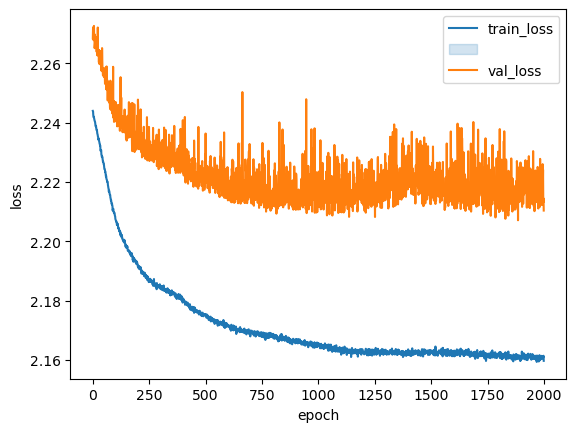

In [24]:
import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', '', 'val_loss'])

### We have room to improve!!

## Does it overfit or underfit the data? We will justify our answer.

This model underfits the data because the training loss appears to steadily decreases with a negative slope
and the validation loss steadily decreases with a negative slope. There is also a good amount of noise in the loss functions.

### Let's see what else we can do

In [25]:
%%time
#Fix the seed
tf.random.set_seed(1)
#Increase the epochs to 2K
history = model.fit(x=X_train,y=y_train,batch_size=64,epochs=2000,
          validation_data=(X_test,y_test), verbose=0
          )

CPU times: total: 11min 49s
Wall time: 36min 10s


In [26]:
%%time
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import max_norm

model = keras.Sequential()
#First hidden layer with 20 neurons
model.add(layers.Dense(20, activation='relu'))
model.add(Dropout(0.5))

# Second hidden layer with 10 neurons
model.add(layers.Dense(10, activation='relu'))
model.add(Dropout(0.5))

# Output layer has one and only one neuron
model.add(layers.Dense( units = len(df['wd'].unique()), activation='softmax'))

#Configure the model by choosing optimizer and loss function
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Fix the seed
tf.random.set_seed(1)
#Fit the Model
history = model.fit(x=X_train,y=y_train,batch_size=64,epochs=2000,
          validation_data=(X_test,y_test), verbose=0
          )

CPU times: total: 11min 5s
Wall time: 38min 53s


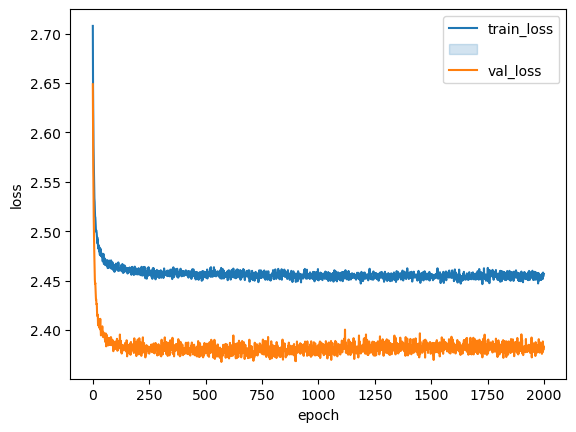

In [27]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame(history.history)
#Add the epoch index
trainhist['epoch'] = history.epoch

import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', '', 'val_loss'])

## 7. Tune the model using the following hyperparameters using keras-tuner

In [28]:
import sys
#Check the existence of the keras-tuner library
if ( 'keras-tuner' not in sys.modules):
    #If it was not installed, then install it
    !pip install -q -U keras-tuner
#Import the library of keras-tuner
    import kerastuner as kt

C:\Users\whitl\AppData\Local\Temp\ipykernel_19684\3295754333.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [29]:
def model_builder(hp):
    model = keras.Sequential()

    # Tune the number of units in the first hidden layer
    # Search the number of neurons from 20-100 with a stepsize of 5 in the first input layer.
    hp_units1 = hp.Int('units1', min_value=20, max_value=100, step=5)
    model.add(layers.Dense(units=hp_units1, activation='relu'))
    # Tune the dropout rate in the first hidden layer
    hp_dropout1 = hp.Float('dropout1', min_value=0.2, max_value=0.8, step=0.1)
    model.add(layers.Dropout(rate=hp_dropout1))

    # Tune the number of units in the second hidden layer
    # Search the number of neurons from10-50 with a stepsize of 2 in the first input layer.
    hp_units2 = hp.Int('units2', min_value=10, max_value=50, step=2)
    model.add(layers.Dense(units=hp_units2, activation='relu'))
    # Tune the dropout rate in the second hidden layer
    hp_dropout2 = hp.Float('dropout2', min_value=0.2, max_value=0.8, step=0.1)
    model.add(layers.Dropout(rate=hp_dropout2))

    # Output layer with 16 neurons
    model.add(layers.Dense(units=16, activation='softmax'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [30]:
tuner = kt.Hyperband(model_builder, #Specify the model
                     objective = 'val_loss', #Specify the objective funciton
                     max_epochs = 100, #Specify the maximum epochs
                     directory = 'Deep_Learning\Week_3', #Specify the file path
                     project_name = 'tuningRegression')

Reloading Tuner from Deep_Learning\Week_3\tuningRegression\tuner0.json


In [31]:
import IPython
#Clear all the training outputs
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [32]:
#Perform the search on the defined hyperparameter space by specifying the callback to clear the training outputs
tuner.search(X_train, y_train, epochs = 100, validation_data = (X_test,y_test), callbacks = [ClearTrainingOutput()])

In [33]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

# Use f-strings to format the outputs
print(f"""
The optimal number of units in the first hidden layer = {best_hps.get('units1')}. 
The optimal dropout rate in the first hidden layer = {best_hps.get('rate1')}
The optimal number of units in the second hidden layer = {best_hps.get('units2')}. 
The optimal dropout rate in the second hidden layer = {best_hps.get('rate2')}
The optimal learning rate for the optimizer of RMSprop = {best_hps.get('learning_rate')}
""") 


The optimal number of units in the first hidden layer = 90. 
The optimal dropout rate in the first hidden layer = 0.4
The optimal number of units in the second hidden layer = 42. 
The optimal dropout rate in the second hidden layer = 0.4
The optimal learning rate for the optimizer of RMSprop = 0.001



### Let's retrain the model!

In [34]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test,y_test))

Epoch 1/100
796/796 [==============================] - 4s 3ms/step - loss: 2.5684 - accuracy: 0.1753 - val_loss: 2.4583 - val_accuracy: 0.1958
Epoch 2/100
796/796 [==============================] - 3s 4ms/step - loss: 2.4411 - accuracy: 0.2018 - val_loss: 2.3947 - val_accuracy: 0.2079
Epoch 3/100
796/796 [==============================] - 3s 4ms/step - loss: 2.3994 - accuracy: 0.2100 - val_loss: 2.3638 - val_accuracy: 0.2125
Epoch 4/100
796/796 [==============================] - 2s 3ms/step - loss: 2.3742 - accuracy: 0.2182 - val_loss: 2.3460 - val_accuracy: 0.2170
Epoch 5/100
796/796 [==============================] - 2s 3ms/step - loss: 2.3601 - accuracy: 0.2203 - val_loss: 2.3361 - val_accuracy: 0.2233
Epoch 6/100
796/796 [==============================] - 2s 3ms/step - loss: 2.3459 - accuracy: 0.2244 - val_loss: 2.3288 - val_accuracy: 0.2265
Epoch 7/100
796/796 [==============================] - 3s 3ms/step - loss: 2.3360 - accuracy: 0.2239 - val_loss: 2.3109 - val_accuracy: 0.2326

Epoch 58/100
796/796 [==============================] - 2s 3ms/step - loss: 2.2218 - accuracy: 0.2509 - val_loss: 2.2181 - val_accuracy: 0.2634
Epoch 59/100
796/796 [==============================] - 2s 3ms/step - loss: 2.2187 - accuracy: 0.2549 - val_loss: 2.2185 - val_accuracy: 0.2587
Epoch 60/100
796/796 [==============================] - 2s 3ms/step - loss: 2.2212 - accuracy: 0.2553 - val_loss: 2.2167 - val_accuracy: 0.2577
Epoch 61/100
796/796 [==============================] - 3s 3ms/step - loss: 2.2199 - accuracy: 0.2539 - val_loss: 2.2112 - val_accuracy: 0.2596
Epoch 62/100
796/796 [==============================] - 3s 3ms/step - loss: 2.2206 - accuracy: 0.2513 - val_loss: 2.2260 - val_accuracy: 0.2533
Epoch 63/100
796/796 [==============================] - 2s 3ms/step - loss: 2.2157 - accuracy: 0.2550 - val_loss: 2.2084 - val_accuracy: 0.2614
Epoch 64/100
796/796 [==============================] - 2s 3ms/step - loss: 2.2156 - accuracy: 0.2539 - val_loss: 2.2188 - val_accuracy:

## The optimal model would have the following parameters:
    The optimal number of units in the first hidden layer = 90.
    The optimal dropout rate in the first hidden layer = 0.4
    The optimal number of units in the second hidden layer = 42. 
    The optimal dropout rate in the second hidden layer = 0.4
    The optimal learning rate for the optimizer of Adam = 0.001

## It would look like this:

In [35]:
from tensorflow.keras.optimizers import RMSprop

def model_create():
    model = keras.Sequential()
    #First hidden layer with 90 neurons
    model.add(layers.Dense(90, activation='relu'))
    model.add(Dropout(0.4))

    # Second hidden layer with 42 neurons
    model.add(layers.Dense(42, activation='relu'))
    model.add(Dropout(0.4))

    # Output layer has one and only one neuron
    model.add(layers.Dense( units = len(df['wd'].unique()), activation='softmax'))

    model.compile(optimizer=RMSprop(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

model = model_create()

### Let's save our model

In [36]:
def model_create():
  model = keras.Sequential()
  #Set the optimal units of 90 found by tuner
  model.add(layers.Dense(units = 90, activation = 'relu'))
  #Set he optimal dropout rate of 0.2 found by tuner
  model.add(Dropout(rate = 0.2))
  #First hidden layer with 100 neurons
  model.add(layers.Dense(10, activation='relu'))
  #Add dropout rate of 50%
  model.add(Dropout(0.2))
  model.add(layers.Dense( units = 16, activation='softmax'))
    
  model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model
# Create the model
model = model_create()

In [37]:
# Specify the directory to save the weights
import os
cp_path = "training/cp.regr"
cp_dir = os.path.dirname(cp_path)

# Create a callback to save the model's weights
# We only save the best weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=cp_path, save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model and specif the defined callback using callbacks=[]
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test,y_test),
         callbacks=[cp_callback])

Epoch 1/100
783/796 [============================>.] - ETA: 0s - loss: 2.6476 - accuracy: 0.1458
Epoch 1: val_loss improved from inf to 2.54825, saving model to training\cp.regr
796/796 [==============================] - 4s 4ms/step - loss: 2.6466 - accuracy: 0.1462 - val_loss: 2.5483 - val_accuracy: 0.1911
Epoch 2/100
786/796 [============================>.] - ETA: 0s - loss: 2.5235 - accuracy: 0.1815
Epoch 2: val_loss improved from 2.54825 to 2.46008, saving model to training\cp.regr
796/796 [==============================] - 4s 5ms/step - loss: 2.5231 - accuracy: 0.1818 - val_loss: 2.4601 - val_accuracy: 0.1988
Epoch 3/100
780/796 [============================>.] - ETA: 0s - loss: 2.4660 - accuracy: 0.1941
Epoch 3: val_loss improved from 2.46008 to 2.40997, saving model to training\cp.regr
796/796 [==============================] - 3s 3ms/step - loss: 2.4648 - accuracy: 0.1944 - val_loss: 2.4100 - val_accuracy: 0.2073
Epoch 4/100
772/796 [============================>.] - ETA: 0s - 

796/796 [==============================] - 2s 3ms/step - loss: 2.2884 - accuracy: 0.2318 - val_loss: 2.2501 - val_accuracy: 0.2335
Epoch 57/100
796/796 [==============================] - ETA: 0s - loss: 2.2831 - accuracy: 0.2350
Epoch 57: val_loss did not improve from 2.24503
796/796 [==============================] - 2s 3ms/step - loss: 2.2831 - accuracy: 0.2350 - val_loss: 2.2549 - val_accuracy: 0.2315
Epoch 58/100
792/796 [============================>.] - ETA: 0s - loss: 2.2843 - accuracy: 0.2313
Epoch 58: val_loss did not improve from 2.24503
796/796 [==============================] - 2s 3ms/step - loss: 2.2847 - accuracy: 0.2311 - val_loss: 2.2488 - val_accuracy: 0.2398
Epoch 59/100
794/796 [============================>.] - ETA: 0s - loss: 2.2833 - accuracy: 0.2296
Epoch 59: val_loss did not improve from 2.24503
796/796 [==============================] - 3s 4ms/step - loss: 2.2833 - accuracy: 0.2295 - val_loss: 2.2506 - val_accuracy: 0.2372
Epoch 60/100
795/796 [================

Epoch 86/100
794/796 [============================>.] - ETA: 0s - loss: 2.2800 - accuracy: 0.2306
Epoch 86: val_loss did not improve from 2.24306
796/796 [==============================] - 3s 4ms/step - loss: 2.2799 - accuracy: 0.2306 - val_loss: 2.2579 - val_accuracy: 0.2351
Epoch 87/100
777/796 [============================>.] - ETA: 0s - loss: 2.2793 - accuracy: 0.2325
Epoch 87: val_loss did not improve from 2.24306
796/796 [==============================] - 3s 3ms/step - loss: 2.2808 - accuracy: 0.2326 - val_loss: 2.2563 - val_accuracy: 0.2376
Epoch 88/100
794/796 [============================>.] - ETA: 0s - loss: 2.2899 - accuracy: 0.2299
Epoch 88: val_loss did not improve from 2.24306
796/796 [==============================] - 3s 3ms/step - loss: 2.2898 - accuracy: 0.2299 - val_loss: 2.2488 - val_accuracy: 0.2417
Epoch 89/100
778/796 [============================>.] - ETA: 0s - loss: 2.2788 - accuracy: 0.2345
Epoch 89: val_loss did not improve from 2.24306
796/796 [==============

In [38]:
#First, create the model
model = model_create()
#Second, load the weights
model.load_weights(cp_path)
#Note here, we don't train the model at all
#Third evaluate the model on the new dataset
loss = model.evaluate(X_test, y_test, verbose=2)

print("Reloaded model from file with loss: {:5.2f}".format(loss[1]))

199/199 - 1s - loss: 2.2431 - accuracy: 0.2387 - 685ms/epoch - 3ms/step
Reloaded model from file with loss:  0.24


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions for X_test as probabilities
prob_predictions = model.predict(X_test)

# Convert probabilities to class predictions
predictions = np.argmax(prob_predictions, axis=1)

# Now you can use confusion_matrix and classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


199/199 [==============================] - 0s 2ms/step
[[ 80 158   8   0 216   0   0   4   0   0   0   8  46   0   0   0]
 [ 57 190   1   6 382   0   0  11   0   0   0   1  39   0   0   0]
 [ 57  67   5   0 128   0   0   0   0   0   0  14  61   0   0   0]
 [ 18  23   1  58 174   1  35  45   0   0   0   1  21   0   0   0]
 [ 40 185   2  24 580   0   7  27   0   0   0   1  46   0   0   3]
 [ 31  48   0  26 295   0   3  21   0   1   0   1  27   0   0   1]
 [  6   8   0  36 101   0  25  71   0   0   0   0  14   0   0   0]
 [ 11  20   0  18 106   0  13 150   0   0   0   3  24   0   0   0]
 [ 31  21   4   0  62   0   0   0   0   1   0  29 116   0   0   1]
 [ 47  30   1   0  89   0   0   0   0   2   0  14  51   0   0   0]
 [ 23  14   2   0  54   0   0   0   0   0   0  16  67   0   0   0]
 [ 30  17   9   2  69   0   0   1   0   1   0  40 229   0   0   2]
 [ 34  18   4   5 118   0   2   7   0   2   0  20 382   0   0   1]
 [ 18  13   0   1 132   0   0   6   0   1   0   1  56   0   0   1]
 [  8  

C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 8 .Build a neuron network with two hidden layers of 20 and 10 neurons to forecast wd using all other features and PyTorch. 

In [40]:
df2.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0


In [41]:
df = df2

In [42]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0


### Excellent, we have our data ready to go, so let's build the model!

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [44]:
X_train = torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.int64))#.reshape(-1,1))

In [45]:
print(y_train.shape)
print(X_train.shape)

torch.Size([25452])
torch.Size([25452, 16])


In [46]:
input_size = X_train.shape[1]
output_size = len(df['wd'].unique())
#specify the number of neuron for the hidden layers
hidden_size = [20, 10]
print(input_size)
print(output_size)

#convert numpy to tensor from_numpy
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.tensor(y_test.values.astype(np.int64))

16
16


In [47]:
# define the child module class derivated from parent class of torch.nn.Module)
class LinearClassificationModel(torch.nn.Module):
    #define the constructor
    def __init__(self, input_size,  hidden_size, output_size):
        super(LinearClassificationModel, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size[0]) 
        self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1]) 
        self.predict = torch.nn.Linear(hidden_size[1], output_size) 
    #overwrite the forward function in this child class
    def forward(self, x):
        x = F.relu(self.hidden1(x))  
        x = F.relu(self.hidden2(x))
        #x = F.relu(self.hidden3(x))
        y_pred = self.predict(x)            
        return y_pred

In [48]:
model = LinearClassificationModel(input_size, hidden_size,  output_size)
l = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [49]:
%%time

#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)

#set the number of epochs
num_epochs = 500

train_loss = [None]*num_epochs
validation_loss = [None]*num_epochs
for epoch in range(num_epochs):
        
        output = model(X_train)
        loss = l(output, y_train)
        train_loss[epoch] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Stop tracking the gradient by calling detach since we don't use it anymore
        y_pred = model(X_test)#.detach().numpy()
        val_loss = l(y_pred, y_test)
        validation_loss[epoch] = val_loss.item()
        if epoch % 500 == 0:
            print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))

epoch 0, loss = 2.7961 and val_loss = 2.7941
CPU times: total: 40.7 s
Wall time: 7.19 s


In [50]:
print(y_pred.shape)
print(y_test.shape)

torch.Size([6363, 16])
torch.Size([6363])


In [51]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': validation_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
trainhist.tail()

,train_loss,val_loss,epoch
495,2.719682,2.720480,495
496,2.719581,2.720383,496
497,2.719479,2.720286,497
498,2.719378,2.720189,498
499,2.719277,2.720093,499


### Let's visualize the results

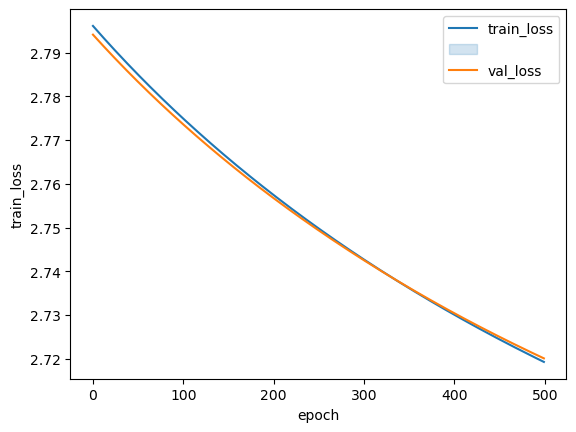

In [52]:
import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', '', 'val_loss'])

### Let's work to improve the model

In [53]:
%%time
from sklearn.metrics import mean_squared_error
#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)


#set the number of epochs

num_epochs = 100000

train_loss = [None]*num_epochs
validation_loss = [None]*num_epochs
for epoch in range(num_epochs):
        
        output = model(X_train)

        loss = l(output, y_train)
        train_loss[epoch] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Stop tracking the gradient by calling detach since we don't use it anymore
        y_pred = model(X_test)#.detach().numpy()
        val_loss = l(y_pred, y_test)
        validation_loss[epoch] = val_loss.item()
        if epoch % 100000 == 0:
            print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))

epoch 0, loss = 2.7192 and val_loss = 2.7200
CPU times: total: 2h 1min 52s
Wall time: 20min 58s


In [54]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': validation_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
trainhist.tail()

,train_loss,val_loss,epoch
99995,2.306060,2.323352,99995
99996,2.306059,2.323351,99996
99997,2.306058,2.323350,99997
99998,2.306057,2.323350,99998
99999,2.306056,2.323349,99999


### Let's visualize the results

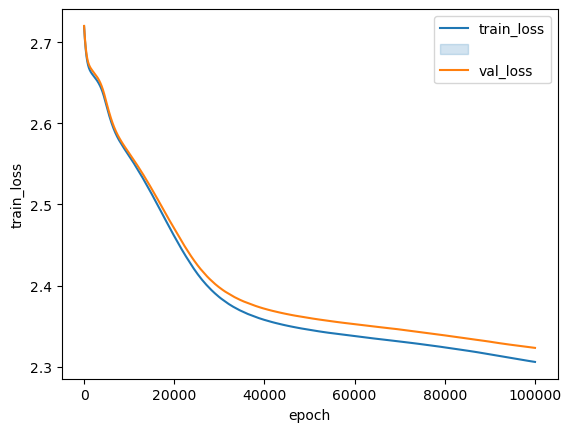

In [55]:
import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', '', 'val_loss'])

### Does it overfit or underfit the data? We will justify our answer.

The model appears to underfit the data, both training loss and validation loss are steadily decreasing with a negative slope as the epochs increase. There is also a gap between validation loss and training loss with validation loss being higher.

### Let's add dropout and regularization on the weights in TensorFlow

In [56]:
%%time
# define the child module class derivated from parent class of torch.nn.Module)
class LinearClassificationModel(torch.nn.Module):
    #define the constructor
    def __init__(self, input_size,  hidden_size, output_size, droprate):
        super(LinearClassificationModel, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size[0]) 
        self.hiidden1_drop = nn.Dropout(droprate)
        self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1]) 
        self.hiidden2_drop = nn.Dropout(droprate)
        self.predict = torch.nn.Linear(hidden_size[1], output_size) 
    #overife the forward function in this child class
    def forward(self, x):
        x = F.relu(self.hiidden1_drop(self.hidden1(x)))  
        x = F.relu(self.hiidden2_drop(self.hidden2(x)))  
        y_pred = self.predict(x)            
        return y_pred

# Create a classification model
droprate = 0.2
model = LinearClassificationModel(input_size, hidden_size,  output_size, droprate)

# Select the Cross Entropy Loss
l = nn.CrossEntropyLoss()

#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)


#set the number of epochs
num_epochs = 1000

train_loss = [None]*num_epochs
valadition_loss = [None]*num_epochs
for epoch in range(num_epochs):
        
        output = model(X_train)
        loss = l(output, y_train)
        train_loss[epoch] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Stop tracking the gradient by calling detach since we don't use it anymore
        y_pred = model(X_test)#.detach().numpy()
        val_loss = l(y_pred, y_test)
        valadition_loss[epoch] = val_loss.item()
        if epoch % 100 == 0:
            print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))

epoch 0, loss = 2.8053 and val_loss = 2.8075
epoch 100, loss = 2.8048 and val_loss = 2.8074
epoch 200, loss = 2.8056 and val_loss = 2.8070
epoch 300, loss = 2.8056 and val_loss = 2.8069
epoch 400, loss = 2.8058 and val_loss = 2.8078
epoch 500, loss = 2.8050 and val_loss = 2.8067
epoch 600, loss = 2.8054 and val_loss = 2.8056
epoch 700, loss = 2.8059 and val_loss = 2.8070
epoch 800, loss = 2.8052 and val_loss = 2.8083
epoch 900, loss = 2.8047 and val_loss = 2.8081
CPU times: total: 1min 27s
Wall time: 16 s


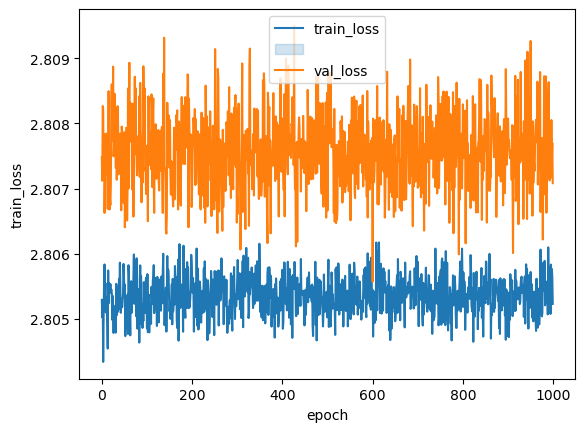

In [57]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': valadition_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
trainhist.tail()

import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', '', 'val_loss'])

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model(X_test).detach().numpy()
print(confusion_matrix(y_test,np.argmax(predictions, axis = 1)))

[[  0   0  44   0   0   0   0 362   0   0 114   0   0   0   0   0]
 [  0   0  77   0   0   0   0 464   0   0 146   0   0   0   0   0]
 [  0   0  38   0   0   0   0 231   0   0  63   0   0   0   0   0]
 [  0   0  28   0   0   0   0 265   0   0  84   0   0   0   0   0]
 [  0   0  92   0   0   0   0 626   0   0 196   0   0   0   0   1]
 [  0   0  44   0   0   0   0 319   0   0  91   0   0   0   0   0]
 [  0   0  25   0   0   0   0 179   0   0  56   0   0   0   0   1]
 [  0   0  40   0   0   0   0 245   0   0  59   0   0   0   0   1]
 [  0   0  26   0   0   0   0 178   0   0  61   0   0   0   0   0]
 [  0   0  26   0   0   0   0 157   0   0  50   0   0   0   0   1]
 [  0   0  19   0   0   0   0 122   0   0  35   0   0   0   0   0]
 [  0   0  34   0   0   0   0 307   0   0  59   0   0   0   0   0]
 [  0   0  51   0   0   0   0 420   0   0 122   0   0   0   0   0]
 [  0   0  24   0   0   0   0 160   0   0  45   0   0   0   0   0]
 [  0   0  18   0   0   0   0 151   0   0  37   0   0   0   0 

In [59]:
print(classification_report(y_test,np.argmax(predictions, axis = 1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       520
           1       0.00      0.00      0.00       687
           2       0.06      0.11      0.08       332
           3       0.00      0.00      0.00       377
           4       0.00      0.00      0.00       915
           5       0.00      0.00      0.00       454
           6       0.00      0.00      0.00       261
           7       0.06      0.71      0.10       345
           8       0.00      0.00      0.00       265
           9       0.00      0.00      0.00       234
          10       0.03      0.20      0.05       176
          11       0.00      0.00      0.00       400
          12       0.00      0.00      0.00       593
          13       0.00      0.00      0.00       229
          14       0.00      0.00      0.00       206
          15       0.20      0.00      0.01       369

    accuracy                           0.05      6363
   macro avg       0.02   

C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
